In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

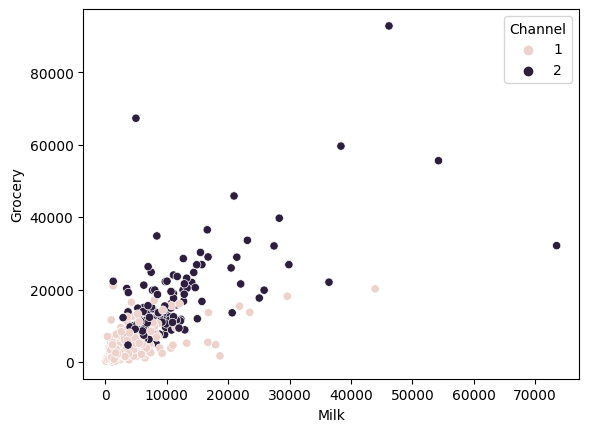

In [4]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue="Channel")

<Axes: xlabel='Milk', ylabel='Count'>

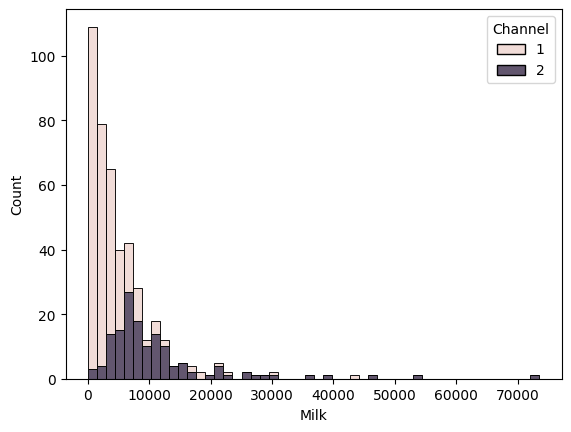

In [5]:
sns.histplot(data=df, x="Milk", hue="Channel", multiple="stack")

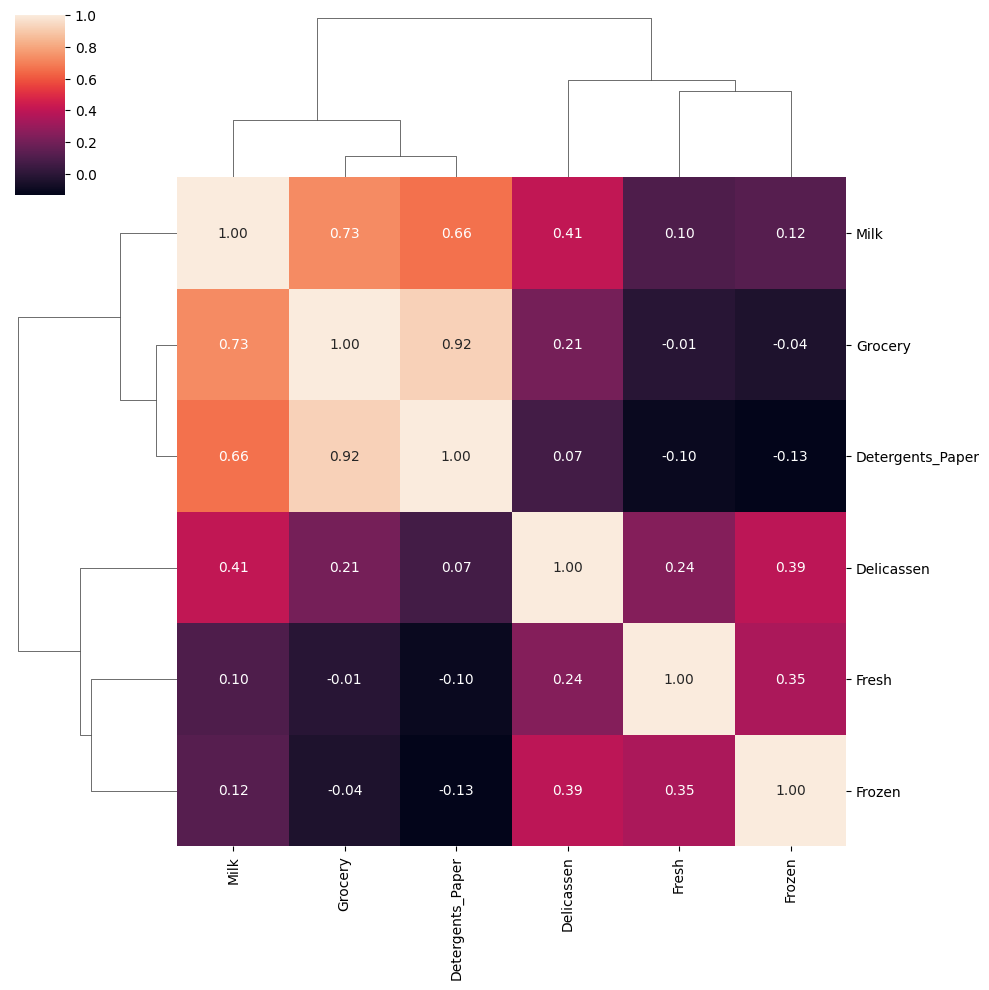

In [6]:
sns.clustermap(data=df.drop(['Region','Channel'],axis=1).corr(), annot=True, fmt=".2f",col_cluster=True)

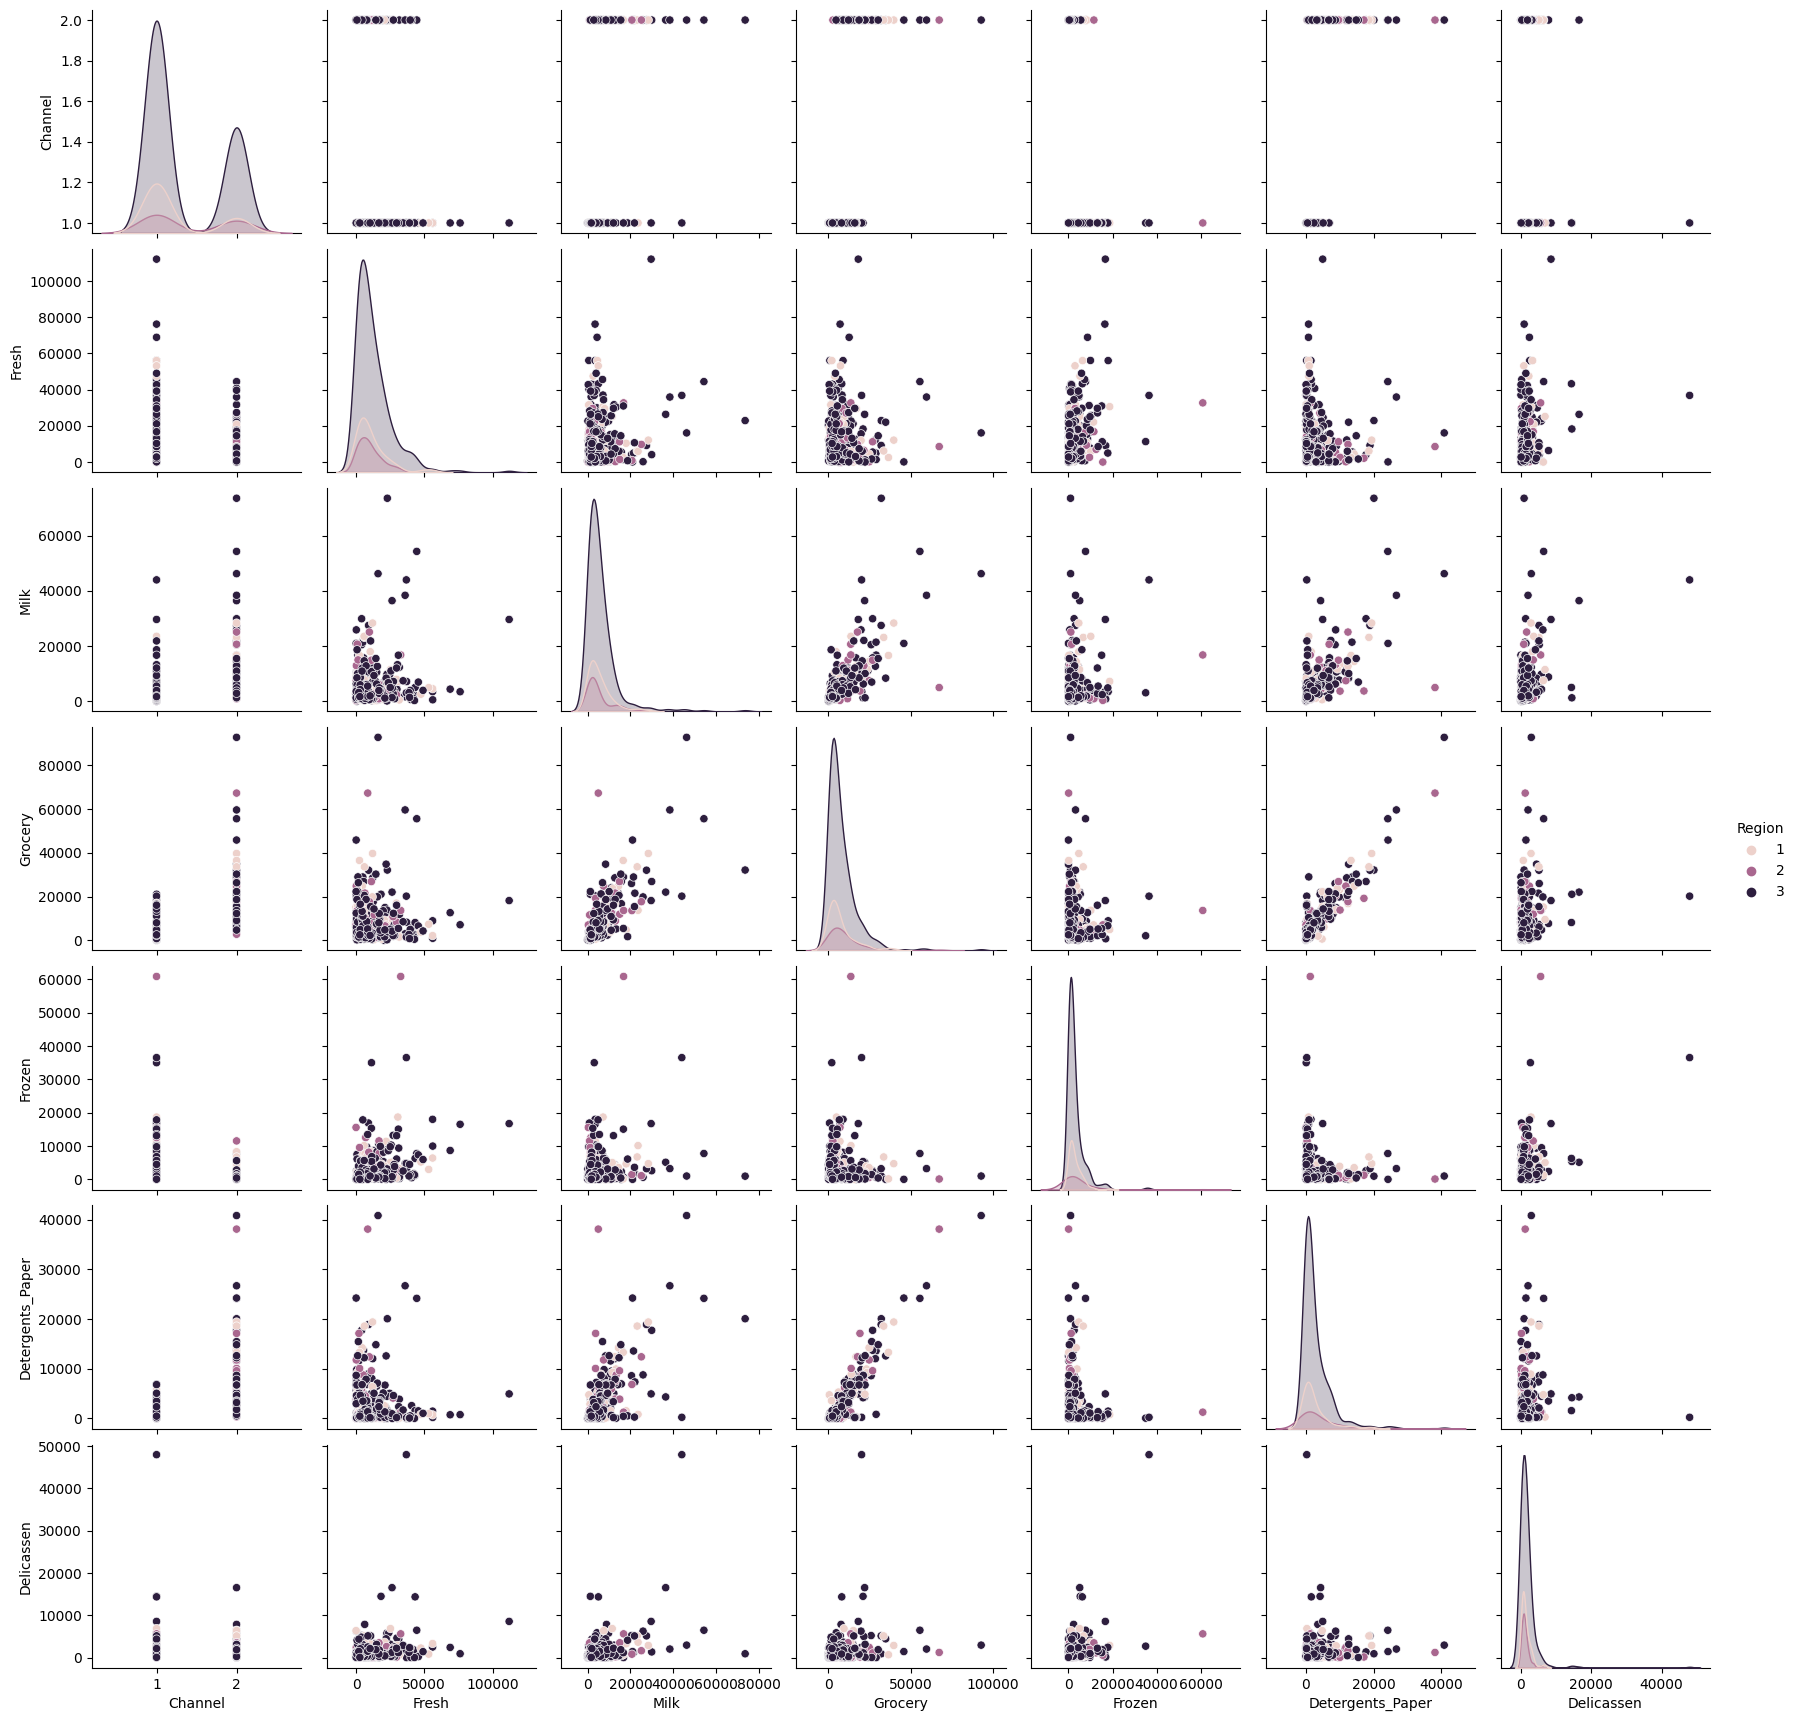

In [7]:
sns.pairplot(data=df, hue="Region")

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [9]:
from sklearn.cluster import DBSCAN

outliers_percentage = []

for eps in np.linspace(0.001, 3, 50):   
    dbscan = DBSCAN(eps=eps,min_samples=2)
    dbscan.fit(X)
    out_per = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outliers_percentage.append(out_per)

<Axes: >

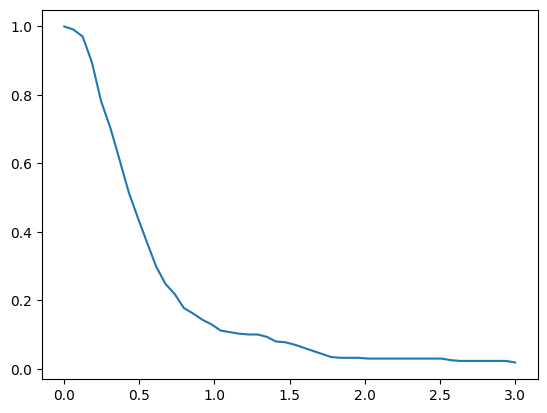

In [10]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outliers_percentage)

In [11]:
dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(X)

<Axes: xlabel='Milk', ylabel='Grocery'>

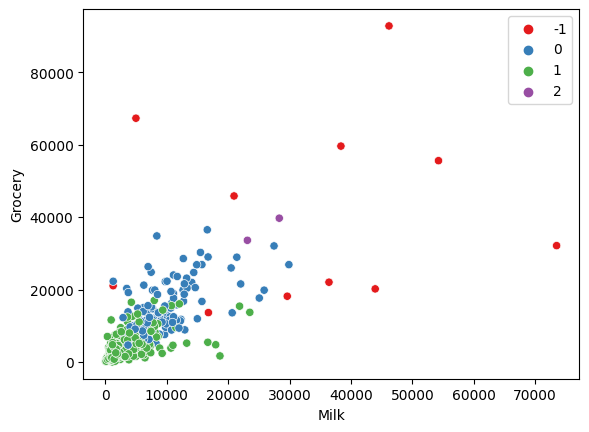

In [12]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue=labels, palette="Set1")

In [13]:
df["Labels"] = labels

In [14]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('Labels').mean()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)

In [16]:
df = pd.DataFrame(data=data, index=cat_means.index , columns=cat_means.columns)

<Axes: >

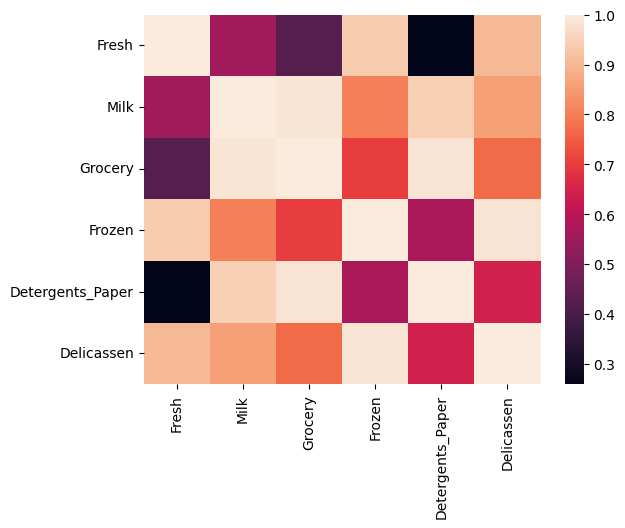

In [17]:
sns.heatmap(df.corr())